In [ ]:
pip install vaderSentiment

In [ ]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

from bs4 import BeautifulSoup
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import requests


tickers_list = ['TSLA']

In [ ]:
news = pd.DataFrame()

for ticker in tickers_list:
   url = f'https://finviz.com/quote.ashx?t={ticker}&p=d'
   ret = requests.get(
       url,
       headers={'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/111.0.0.0 Safari/537.36'},
   )

   html = BeautifulSoup(ret.content, "html.parser")

   try:
     df = pd.read_html(
         str(html),
         attrs={'class': 'fullview-news-outer'}
     )[0]
   except:
     print(f"{ticker} No news found")
     continue

   df.columns = ['Date', 'Headline']

df.tail()

,Date,Headline
98,01:00PM,"Top Stock Movers Now: Google Parent Alphabet, ..."
99,12:40PM,Tesla shares gain after Model Y price hike in ...
100,12:30PM,Watch: Don Lemon Asks Elon Musk About Drug Use...
101,12:22PM,"Alphabet, Tesla rise; Hertz, Logitech fall, Mo..."
102,12:22PM,XPeng Ready To Launch a Lower-Priced EV Brand ...


In [ ]:
dateNTime = df.Date.apply(lambda x: ','+x if len(x)<8 else x).str.split(r' |,', expand = True).replace("", None).ffill()
df = pd.merge(df, dateNTime, right_index=True, left_index=True).drop('Date', axis=1).rename(columns={0:'Date', 1:'Time'})
df = df[df["Headline"].str.contains("Loading.") == False].loc[:, ['Date', 'Time', 'Headline']]
df["Ticker"] = ticker
news = pd.concat([news, df], ignore_index = True)
news.head()

,Date,Time,Headline,Ticker
0,Today,12:31PM,20 Largest Companies in the World by Market Ca...,TSLA
1,Today,12:29PM,Magnificent Seven Stocks To Buy And Watch: Nvi...,TSLA
2,Today,11:33AM,Tesla Has an Elon Musk Problem. The Stock Coul...,TSLA
3,Today,10:25AM,Tesla Stock Is Up. Investors Must Have Missed ...,TSLA
4,Today,10:22AM,UPDATE 2-Senator Warren urges SEC to investiga...,TSLA


In [ ]:
nltk.download('vader_lexicon')
vader = SentimentIntensityAnalyzer()

scored_news = news.join(
  pd.DataFrame(news['Headline'].apply(vader.polarity_scores).tolist())
)

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Text(0.5, 1.0, 'Percentage Change of Weekly Sentiment Score for TSLA')

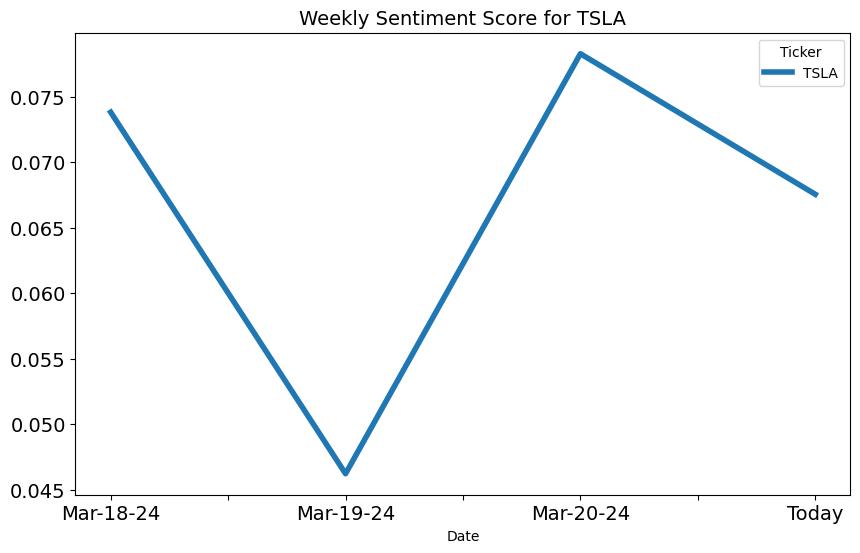

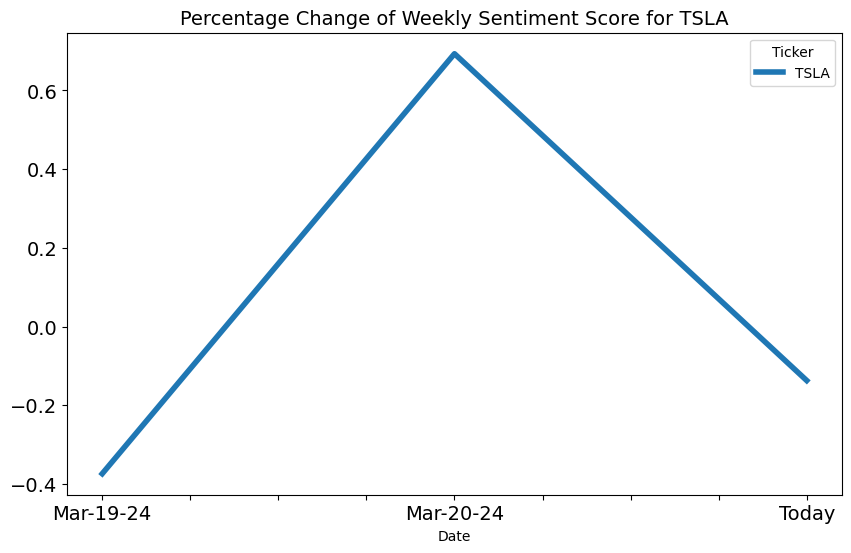

In [ ]:
news_score = scored_news.loc[:, ['Ticker', 'Date', 'compound']].pivot_table(values='compound', index='Date', columns='Ticker', aggfunc='mean').ewm(15).mean()
news_score.dropna().plot(figsize=(10, 6),linewidth=4,kind='line',legend=True, fontsize=14)
plt.title("Weekly Sentiment Score for TSLA",fontsize=14)

news_score.pct_change().dropna().plot(figsize=(10, 6),linewidth=4,kind='line',legend=True, fontsize=14)
plt.title("Percentage Change of Weekly Sentiment Score for TSLA",fontsize=14)

In [ ]:
# first, import Beautiful Soup and urllib for scraping + other...
# libraries to work with the data
from bs4 import BeautifulSoup
from urllib.request import urlopen, Request
import pandas as pd
from datetime import date, timedelta

# let's pick a ticker. For example, Amazon - AMZN
stock = 'AMZN'
news = {}

# copy the finviz url
# (it may change over time so make sure url ending is correct)
url = f'https://finviz.com/quote.ashx?t={stock}&p=d'
request = Request(url=url, headers={'user-agent': 'news_scraper'})
response = urlopen(request)

# parse the data
html = BeautifulSoup(response, features='html.parser')
finviz_news_table = html.find(id='news-table')
news[stock] = finviz_news_table

# filter and store neede in news_parsed
news_parsed = []
for stock, news_item in news.items():
    for row in news_item.findAll('tr'):
        try:
            headline = row.a.getText()
            source = row.span.getText()
            news_parsed.append([stock, headline])
        except:
            pass

# convert to a dataframe for data analysis
df = pd.DataFrame(news_parsed, columns=['Stock', 'Headline'])
df

,Stock,Headline
0,AMZN,Why the Department of Justice Is Suing Apple
1,AMZN,15 Dorm Room Business Ideas for College Students
2,AMZN,15 Top Amazon Web Services Alternatives in 2024
3,AMZN,20 Largest Companies in the World by Market Cap in 2024
4,AMZN,Jeff Bezos And His Ex-Wife Let Their Children Use 'Sharp Knives' At Age 4: 'Rather Have A Kid With 9 Fingers Than A Resourceless Kid'
...,...,...
95,AMZN,Top 5 Richest Women in the World in 2024
96,AMZN,4 Reasons to Buy Amazon Stock Like There's No Tomorrow
97,AMZN,50 Cities With The Largest Population In The US
98,AMZN,These 2 Dow Stocks Are Set to Soar in 2024 and Beyond


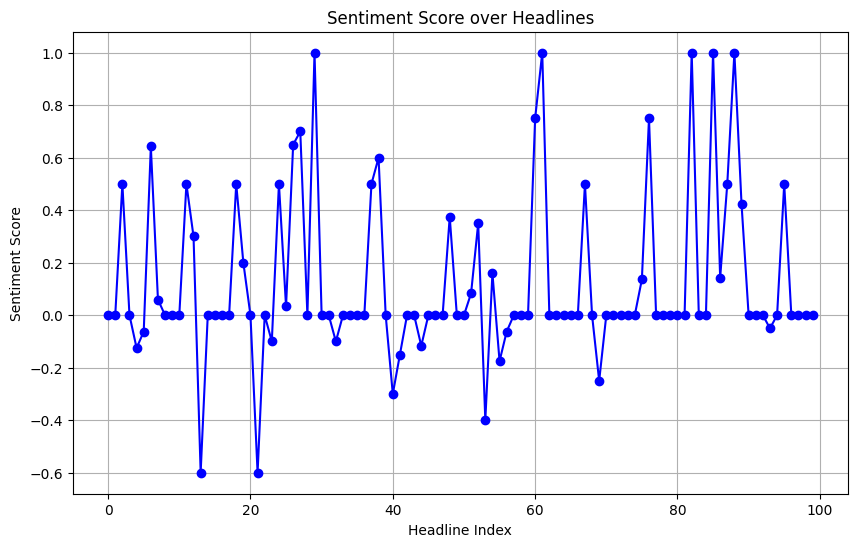

,Stock,Headline,Sentiment Score
0,AMZN,Why the Department of Justice Is Suing Apple,0.000
1,AMZN,15 Dorm Room Business Ideas for College Students,0.000
2,AMZN,15 Top Amazon Web Services Alternatives in 2024,0.500
3,AMZN,20 Largest Companies in the World by Market Cap in 2024,0.000
4,AMZN,Jeff Bezos And His Ex-Wife Let Their Children Use 'Sharp Knives' At Age 4: 'Rather Have A Kid With 9 Fingers Than A Resourceless Kid',-0.125
...,...,...,...
95,AMZN,Top 5 Richest Women in the World in 2024,0.500
96,AMZN,4 Reasons to Buy Amazon Stock Like There's No Tomorrow,0.000
97,AMZN,50 Cities With The Largest Population In The US,0.000
98,AMZN,These 2 Dow Stocks Are Set to Soar in 2024 and Beyond,0.000


In [ ]:
from bs4 import BeautifulSoup
from urllib.request import urlopen, Request
import pandas as pd
from datetime import date, timedelta
from textblob import TextBlob  # Importer TextBlob pour l'analyse des sentiments

# let's pick a ticker. For example, Amazon - AMZN
stock = 'AMZN'
news = {}

# copy the finviz url
# (it may change over time so make sure url ending is correct)
url = f'https://finviz.com/quote.ashx?t={stock}&p=d'
request = Request(url=url, headers={'user-agent': 'news_scraper'})
response = urlopen(request)

# parse the data
html = BeautifulSoup(response, features='html.parser')
finviz_news_table = html.find(id='news-table')
news[stock] = finviz_news_table

# filter and store needed data in news_parsed
news_parsed = []
for stock, news_item in news.items():
    for row in news_item.findAll('tr'):
        try:
            headline = row.a.getText()
            # Ajouter l'analyse de sentiment ici
            sentiment_score = TextBlob(headline).sentiment.polarity
            news_parsed.append([stock, headline, sentiment_score])
        except:
            pass

# convert to a dataframe for data analysis
df = pd.DataFrame(news_parsed, columns=['Stock', 'Headline', 'Sentiment Score'])

import matplotlib.pyplot as plt

# Plot des scores de sentiment
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Sentiment Score'], marker='o', linestyle='-', color='b')
plt.title('Sentiment Score over Headlines')
plt.xlabel('Headline Index')
plt.ylabel('Sentiment Score')
plt.grid(True)
plt.show()

df

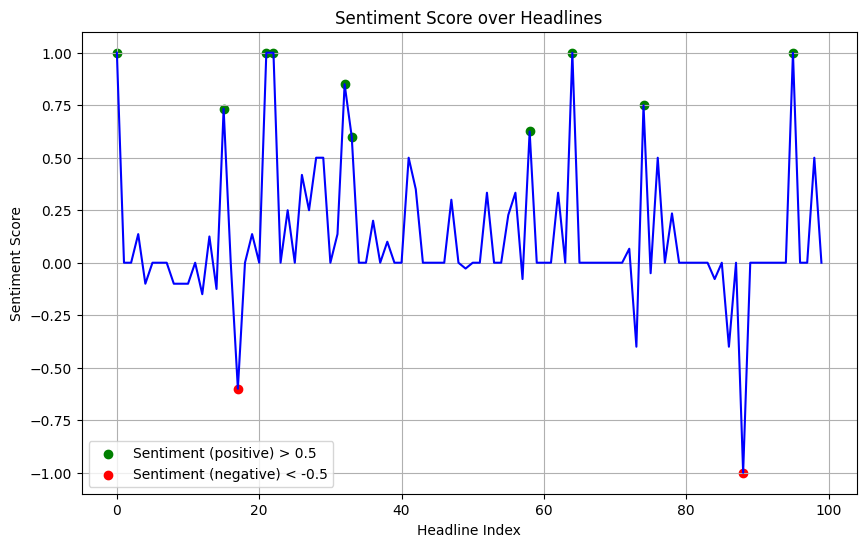

,Stock,Headline,Sentiment Score
0,TSLA,"Magnificent Seven Stocks To Buy And Watch: Nvidia Stock Rallies; Apple, Tesla Fall",1.000000
1,TSLA,"Elon Musk's SpaceX retaliated against employees who discussed pay, labor board says",0.000000
2,TSLA,"Tesla Stock Was Up, Until Investors Saw This.",0.000000
3,TSLA,Elon Musk's companies are into Nvidia's new AI chips,0.136364
4,TSLA,Elizabeth Warren Urges SEC to Investigate Tesla Over Board Independence,-0.100000
...,...,...,...
95,TSLA,"My ketamine prescription is in the best interests of Tesla investors, says Elon Musk",1.000000
96,TSLA,UPDATE 1-UAW says workers at VW Tennessee plant file for union election,0.000000
97,TSLA,Tesla Stock Soars. Its Raising Model Y Prices.,0.000000
98,TSLA,"Top Stock Movers Now: Google Parent Alphabet, Tesla, Logitech, and More",0.500000


In [ ]:
from bs4 import BeautifulSoup
from urllib.request import urlopen, Request
import pandas as pd
from datetime import date, timedelta
from textblob import TextBlob  # Importer TextBlob pour l'analyse des sentiments

# Sélection d'un ticker, par exemple Amazon - AMZN
stock = 'TSLA'
news = {}

# Copiez l'URL de Finviz
url = f'https://finviz.com/quote.ashx?t={stock}&p=d'
request = Request(url=url, headers={'user-agent': 'news_scraper'})
response = urlopen(request)

# Parsez les données
html = BeautifulSoup(response, features='html.parser')
finviz_news_table = html.find(id='news-table')
news[stock] = finviz_news_table

# Filtrer et stocker les informations nécessaires dans news_parsed
news_parsed = []
for stock, news_item in news.items():
    for row in news_item.findAll('tr'):
        try:
            headline = row.a.getText()
            # Ajouter l'analyse de sentiment ici
            sentiment_score = TextBlob(headline).sentiment.polarity
            news_parsed.append([stock, headline, sentiment_score])
        except:
            pass

# Convertir en DataFrame pour l'analyse des données
df = pd.DataFrame(news_parsed, columns=['Stock', 'Headline', 'Sentiment Score'])

import matplotlib.pyplot as plt

# Plot des scores de sentiment
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Sentiment Score'], linestyle='-', color='b')  # Tracer la ligne
# Colorer les points en fonction du score de sentiment
plt.scatter(df.index[df['Sentiment Score'] > 0.5], df['Sentiment Score'][df['Sentiment Score'] > 0.5], color='g', label='Sentiment (positive) > 0.5')
plt.scatter(df.index[df['Sentiment Score'] < -0.5], df['Sentiment Score'][df['Sentiment Score'] < -0.5], color='r', label='Sentiment (negative) < -0.5')
plt.title('Sentiment Score over Headlines')
plt.xlabel('Headline Index')
plt.ylabel('Sentiment Score')
plt.legend()  # Afficher la légende
plt.grid(True)
plt.show()

df
